# Distancias

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("../../datasets/movies/movies.csv", sep = ";")
data.shape

(10, 4)

In [3]:
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [4]:
movies = data.columns.values.tolist()
movies[1:]

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [5]:
dd1 = distance_matrix(data[movies[1:]], data[movies[1:]], p = 1)
dd2 = distance_matrix(data[movies[1:]], data[movies[1:]], p = 2)
dd10 = distance_matrix(data[movies[1:]], data[movies[1:]], p = 10)

In [6]:
def dm_to_df(ddm, col_name):
    import pandas as pd
    return pd.DataFrame(ddm, index = col_name, columns = col_name)

In [7]:
dm_to_df(dd1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [8]:
dm_to_df(dd10, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


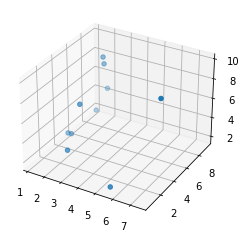

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d") # Ejes
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs = data["harry_potter"]) # Scatter

## Enlaces

In [10]:
df = dm_to_df(dd1, data["user_id"])
Z = []

In [11]:
df["10-1"] = df[1] + df[10]
df.loc["10-1"] = df.loc[1] + df.loc[10]
Z.append([1,10,0.7,2])
df

user_id,1,2,3,4,5,6,7,8,9,10,10-1
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [12]:
for i in df.columns.values.tolist():
    df.loc["10-1"][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i]["10-1"] = min(df.loc[i][1], df.loc[i][10])

In [13]:
df = df.drop([1,10])
df = df.drop([1,10], axis = 1)
df

user_id,2,3,4,5,6,7,8,9,10-1
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
10-1,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [14]:
for i in range(df.values.shape[0]):
    mt = df.values
    mt[i,i] = max(mt.max(1))

min(mt.min(1))

0.7999999999999994

In [15]:
x = 2
y = 7

nam = str(x) + "-" + str(y)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y])
    
df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,5,6,8,9,10-1,2-7
user_id,,,,,,,,
3,18.5,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,18.5,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,18.5,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,18.5,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,18.5,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,18.5,4.9,11.7
10-1,15.2,8.8,3.9,6.2,7.1,4.9,18.5,9.6
2-7,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.8


In [16]:
for i in range(df.values.shape[0]):
    mt = df.values
    mt[i,i] = max(mt.max(1))

min(mt.min(1))

3.2

In [17]:
x = 5
y = 8

nam = str(x) + "-" + str(y)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y])
    
df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,10-1,2-7,5-8
user_id,,,,,,,
3,18.5,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,18.5,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,18.5,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,18.5,4.9,11.7,8.2
10-1,15.2,8.8,6.2,4.9,18.5,9.6,3.9
2-7,12.0,17.2,6.2,11.7,9.6,18.5,4.9
5-8,17.3,12.7,8.3,8.2,3.9,4.9,3.2


In [18]:
for i in range(df.values.shape[0]):
    mt = df.values
    mt[i,i] = max(mt.max(1))

min(mt.min(1))

3.900000000000001

In [19]:
x = str(10) + "-" + str(1)
y = str(5) + "-" + str(8)

nam = str(x) + "-" + str(y)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y])
    
df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,2-7,10-1-5-8
user_id,,,,,,
3,18.5,12.4,9.0,12.9,12.0,15.2
4,12.4,18.5,11.0,5.5,17.2,8.8
6,9.0,11.0,18.5,5.5,6.2,6.2
9,12.9,5.5,5.5,18.5,11.7,4.9
2-7,12.0,17.2,6.2,11.7,18.5,4.9
10-1-5-8,15.2,8.8,6.2,4.9,4.9,3.9


In [20]:
for i in range(df.values.shape[0]):
    mt = df.values
    mt[i,i] = max(mt.max(1))

min(mt.min(1))

4.9

In [21]:
x = 9
y = str(10) + "-" + str(1) + "-" + str(5) + "-" + str(8)
z = str(2) + "-" + str(7)

nam = str(x) + "-" + str(y) + "-" + str(z)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])
    
df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,4,6,9-10-1-5-8-2-7
user_id,,,,
3,18.5,12.4,9.0,12.0
4,12.4,18.5,11.0,5.5
6,9.0,11.0,18.5,5.5
9-10-1-5-8-2-7,12.0,5.5,5.5,4.9


In [22]:
x = 4
y = str(9) + "-" + str(10) + "-" + str(1) + "-" + str(5) + "-" + str(8) + "-" + str(2) + "-" + str(7)
z = 6

nam = str(x) + "-" + str(y) + "-" + str(z)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])
    
df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,4-9-10-1-5-8-2-7-6
user_id,,
3,18.5,9.0
4-9-10-1-5-8-2-7-6,9.0,4.9


In [23]:
x = 3
y = str(4) + "-" + str(9) + "-" + str(10) + "-" + str(1) + "-" + str(5) + "-" + str(8) + "-" + str(2) + "-" + str(7) + "-" + str(6)

nam = str(x) + "-" + str(y)

df[nam] = df[x] + df[y]
df.loc[nam] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
    df.loc[nam][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][nam] = min(df.loc[i][x], df.loc[i][y])
    
df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3-4-9-10-1-5-8-2-7-6
user_id,
3-4-9-10-1-5-8-2-7-6,4.9


In [24]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 ['10-1', '5-8', 3.900000000000001, 2],
 [9, '10-1-5-8', 4.9, 3],
 [4, '9-10-1-5-8-2-7', 5.499999999999999, 3],
 [3, '4-9-10-1-5-8-2-7-6', 9.0, 2]]

## Clustering jerárquico

In [50]:
E_w = linkage(data[movies], "ward")
E_a = linkage(data[movies], "average")
E_c = linkage(data[movies], "complete")
E_s = linkage(data[movies], "single")

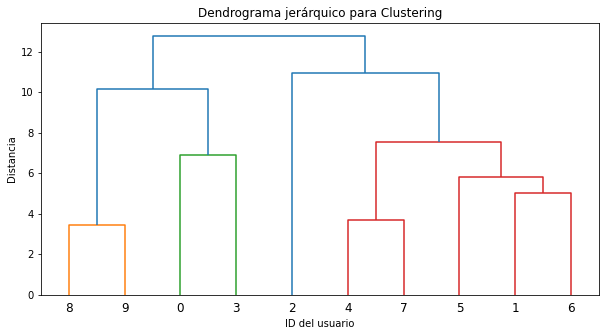

In [48]:
plt.figure(figsize = (10,5))
plt.title("Dendrograma jerárquico para Clustering")
plt.xlabel("ID del usuario")
plt.ylabel("Distancia")
dendrogram(E_w, leaf_font_size = 12)
plt.show()

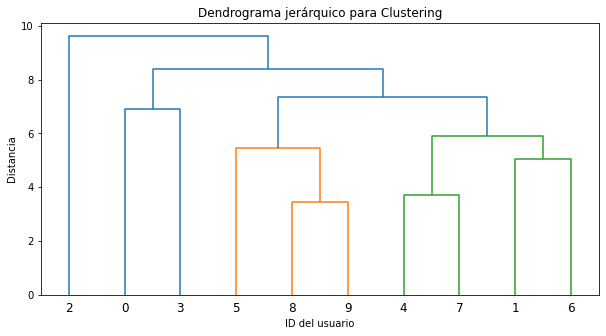

In [49]:
plt.figure(figsize = (10,5))
plt.title("Dendrograma jerárquico para Clustering")
plt.xlabel("ID del usuario")
plt.ylabel("Distancia")
dendrogram(E_a, leaf_font_size = 12)
plt.show()

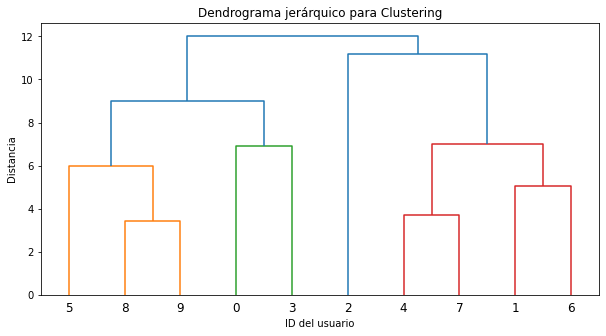

In [51]:
plt.figure(figsize = (10,5))
plt.title("Dendrograma jerárquico para Clustering")
plt.xlabel("ID del usuario")
plt.ylabel("Distancia")
dendrogram(E_c, leaf_font_size = 12)
plt.show()

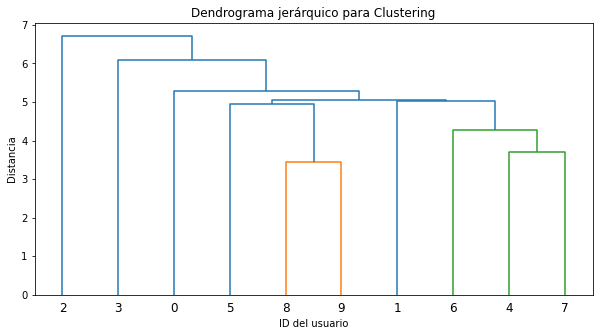

In [52]:
plt.figure(figsize = (10,5))
plt.title("Dendrograma jerárquico para Clustering")
plt.xlabel("ID del usuario")
plt.ylabel("Distancia")
dendrogram(E_s, leaf_font_size = 12)
plt.show()